Back propagation is the learning algorithm applied to almost all supervised neural networks. It uses data as a teacher and propagates errors made by the neural network (when compared with the teachers result) backward through the neural network. This backward propagation attempts to reduce the sources of error in the final result. Back prop is normally used with a gradient descent optimiser, but others can work more effectively.

So first we will start with a simple two layer neural network.

In [2]:
import numpy as np
class Network():
    def __init__(self,shape): #shape = (num inputs, num ouputs)    
        self.weights = np.random.random(shape)
        #add biases on the last layer - to ensure that output node can be activated with little input 
        self.biases = np.random.random(shape[-1]) 
         
    def forward(self,x):
        #take the input and pass it throuh the network giving the output
        return logistic(np.dot(x,self.weights) + self.biases)
    
def logistic(z): #the logistic/sigmoid activation function
    return 1/(1+np.exp(-z))

So we want this neural network to learn from data. It needs to adapt itself from past experience to achieve some sort of goal. In this case we are setting its goal to be accuracy, when compared to some user defined function (represented in the data provided). The way we are going to adapt the net is to change the values of the weights and biases. 

But, how do we know how much to change the weights/biases, which direction the weights/biases need changing and which weights/biases need changing? If we could calculate how the error is effected by each weight/bias then changes required would be simple to determine.

So, we could take the output given by this net and calculate the error w.r.t. an input-output pair given in the training data.

Note that there are alternatives to how we could adapt the net.
* Changing its structure by adding or removing nodes/neurons and edges/synapses (note that there is an implicit assumption that two nodes should only have one edge between them)
* Using different activation functions
* Using different aggregation functions (this is commonly not considered and the manhattan distance is genreally the default, the result of matrix multiplication)

In [3]:
#lets create a network with 5 inputs and 1 output
Net = Network((5,1)) 
#set the input as
input_values = [-5,1,0,3,-1] 
#and calculate
out = Net.forward(input_values) 
print('The neural nets result = ' + str(out))

#the expected result the given input
target = [1]
#thus the error
error = target - out
print('The error = '+ str(error))

The neural nets result = [ 0.00545415]
The error = [ 0.99454585]


We would like to be able to tell the optimiser to find the lowest error, in the case of a straight line, this means it would find negative infinity (if we used gradient descent, but what about newton iterations??). We could use the absolute value function to fix this problem, also plotted below, but this makes the function discontinuious. Which means we would have to rethink using derivatives.

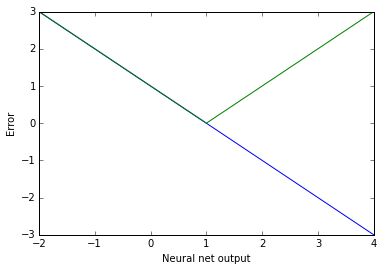

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
outputs = np.linspace(-2,4,21)
error = (target - outputs)
plt.plot(outputs,error)
plt.plot(outputs,abs(error), c = 'green')
plt.xlabel('Neural net output')
plt.ylabel('Error')

Thus, it is common to use the squared error ( 2*error = (target-out)^2) as this will make things nicer later. Also, it gives use a nice convex surface to optimise. 

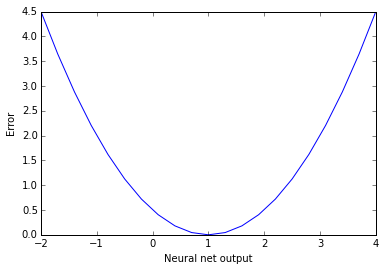

In [5]:
error = ((target - outputs)**2)/2
plt.plot(outputs,error)
plt.xlabel('Neural net output')
plt.ylabel('Error')

So, from this equation (2*error = (target-out)^2) we can see that the output of the net (which is dependent on the weights and biases) is related to the error. We could substitue in the equation for the output, in terms of states and weights, but this doesnt tell us how to change the weights. We need to differentiate.

If we differentiate the equation for error w.r.t. output we get: d error/d out = target - out. (because it was squared we get this nice equation). So now we know how the error changes w.r.t. the output, but we want to know how the error changes w.r.t. a weight. ...(product rule???

We can find how the input to a node, in a layer, changes w.r.t. to a single weight. As we know that: Input(to a node)= states of previous layer * weights connecting them. In 'forward()' it is shown as = np.dot(x,self.weights) + self.biases. Therefore, d input / d weight(i,j) = weight(i,j).


Wha about the biases?

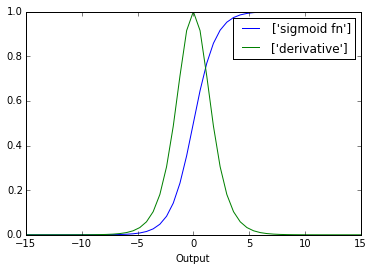

In [7]:
x = np.linspace(-15,15,51)
y = logistic(x)
z = np.exp(x)/((np.exp(x)  + 1)**2)
plt.plot(x,y,c='g', label = ['sigmoid fn'])
plt.plot(x,z/0.25,c= 'b',label = ['derivative'])
plt.legend()
plt.xlabel('Input')
plt.xlabel('Output')

In engineering controls, most controlled systems use a negative feedback loop to check that the outputs, or end states, of the system are close to user specified targets. A method for ensuring this is called PID control, which stands for proportional, derviative and integral control. Where the system is corrected by a proportional/derivative/integral foctor of the error. So back prop seems very similar to derivative control.

My question is, can we pair derivative control with proportional and integral control to ensure faster learning rates, greater efficiency and/or increased accuracy.

Questions
* What if we do not know the analytic/symbolic derivative of the activation function??
* The saturation of logistic neurons.
* What if the error formed a circle? Would this make it easier? As the gradient would always be nicely bounded?
